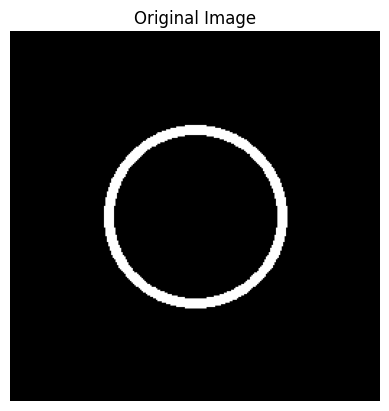

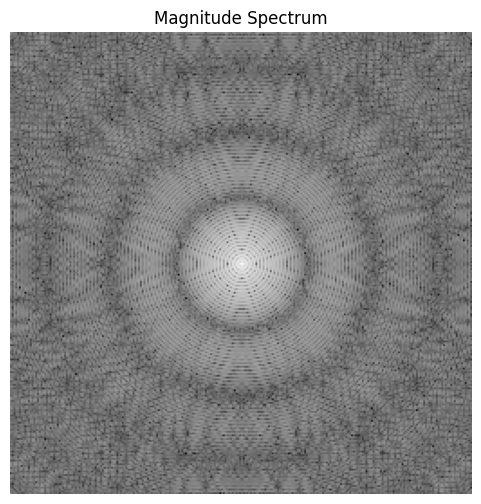

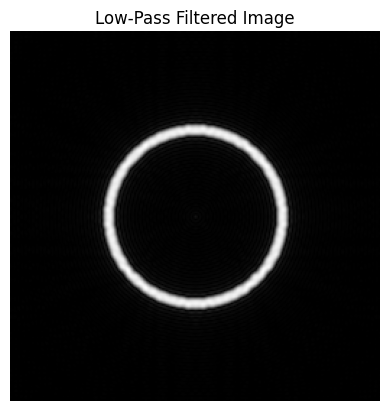

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import chirp
from scipy.io.wavfile import write

# generate image
size = 256
img = np.zeros((size, size), dtype=np.uint8)
cv2.circle(img, (size//2, size//2), 60, 255, thickness=5)
cv2.imwrite('ring.png', img)

# load greyscale image
image = cv2.imread('ring.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Compute 2D FFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Shift zero freq. to center

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2

# Create a low-pass filter mask (circle in the center)
mask_lp = np.zeros((rows, cols), np.uint8)
r = 50  # Radius
cv2.circle(mask_lp, (ccol, crow), r, 1, thickness=-1)

# Create high-pass mask as complement
mask_hp = 1 - mask_lp

# Apply the masks
fshift_lp = fshift * mask_lp
fshift_hp = fshift * mask_hp

# Inverse shift and IFFT for low-pass
f_ishift_lp = np.fft.ifftshift(fshift_lp)
img_back_lp = np.fft.ifft2(f_ishift_lp)
img_back_lp = np.abs(img_back_lp)

# Display the result
plt.imshow(img_back_lp, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')
plt.show()

Current working directory: c:\Users\PC COMPUTER\Downloads\dsp\Task 7


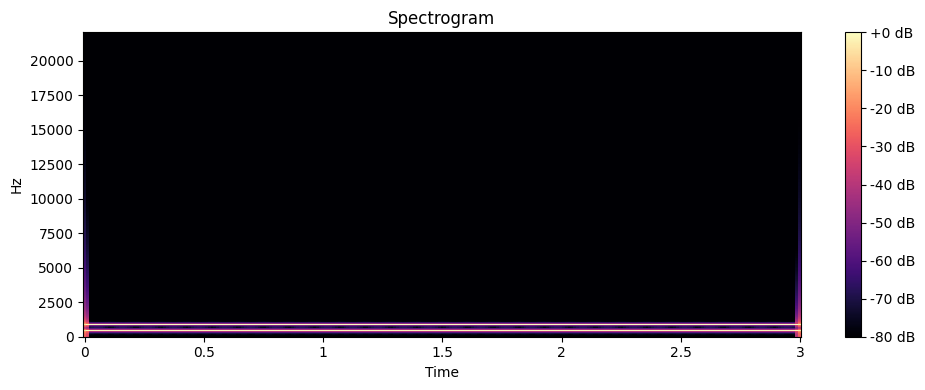

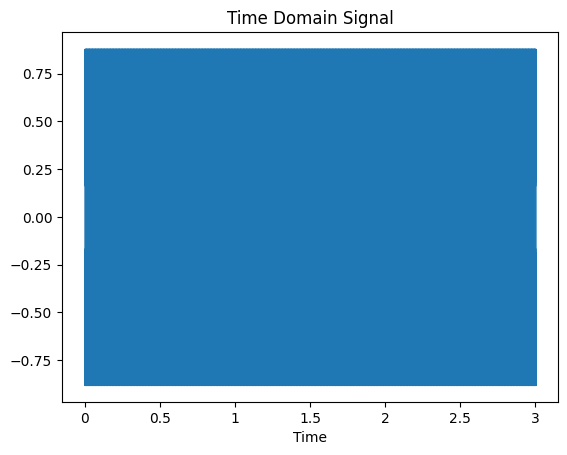

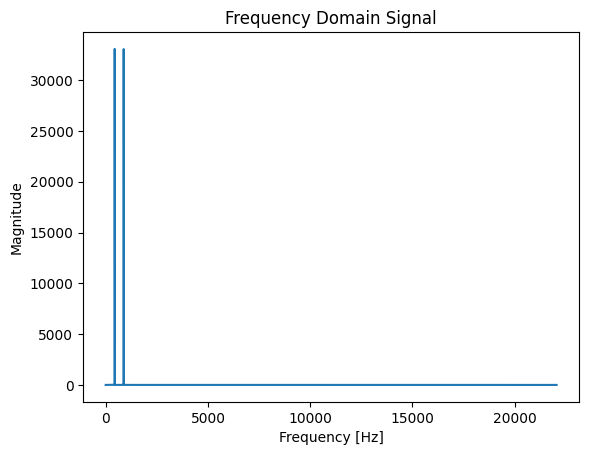

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import librosa
import librosa.display

# generate audio
fs = 44100
duration = 3
t = np.linspace(0, duration, int(fs * duration))
y = 0.5 * np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 880 * t)
write('harmonics.wav', fs, (y * 32767).astype(np.int16))

# Load audio file
import os
print("Current working directory:", os.getcwd())
y, sr = librosa.load('harmonics.wav', sr=None)

# Compute STFT
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Display spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

# Plot waveform (time domain)
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.title('Time Domain Signal')

# Plot magnitude spectrum (frequency domain)
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(Y), 1/sr)
plt.figure()
plt.plot(freqs[:len(freqs)//2], np.abs(Y[:len(Y)//2]))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()